# MVP Sprint I - PUC Rio Ciência de Dados 2023
# Aluna : Nicole Bidigaray

# Análise dos Dados do Airbnb - Rio de Janeiro

## Descrição do Problema:

### O Airbnb já é considerado como sendo a maior empresa hoteleira da atualidade. Ah, o detalhe é que ele não possui nenhum hotel: https://www.airbnb.com.br/

### Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

### Hoje o serviço está presente em mais de 30 mil cidades e 192 países, oferecendo das opções mais convencionais até as mais inusitadas como iglus, casas em árvore, barcos entre outras.

### No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

### Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

## Obtenção dos Dados

### Os dados utilizados nesta análise foram obtidos através do site Inside Airbnb: http://insideairbnb.com/get-the-data/

### Iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.

### Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:
https://raw.githubusercontent.com/Nicole-Bidigaray/MVP-Sprint-1-PUC-RIO-2023/main/Airbnb-RJ-2023.csv

In [3]:
# importar os pacotes necessários
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

from IPython.display import display, Markdown

## Verifica a versão da matplotlib instalada
mpl.__version__

'3.7.0'

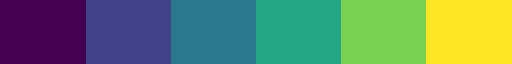

['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

In [16]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 6) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(6)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

# plt.rcdefaults() # Restaura a configuração default

In [18]:
# importar o arquivo Airbnb-RJ-2023.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/Nicole-Bidigaray/MVP-Sprint-1-PUC-RIO-2023/main/Airbnb-RJ-2023.csv")

# Análise dos Dados

## Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

### Dicionário das variáveis

#### * `id` - número de id gerado para identificar o imóvel
#### * `name` - nome da propriedade anunciada
#### * `host_id` - número de id do proprietário (anfitrião) da propriedade
#### * `host_name` - Nome do anfitrião
#### * `neighbourhood_group` - esta coluna não contém nenhum valor válido
#### * `neighbourhood` - nome do bairro
#### * `latitude` - coordenada da latitude da propriedade
#### * `longitude` - coordenada da longitude da propriedade
#### * `room_type` - informa o tipo de quarto que é oferecido
#### * `price` - preço para alugar o imóvel
#### * `minimum_nights` - quantidade mínima de noites para reservar
#### * `number_of_reviews` - número de reviews que a propriedade possui
#### * `last_review` - data do último review
#### * `reviews_per_month` - quantidade de reviews por mês
#### * `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
#### * `availability_365` - número de dias de disponibilidade dentro de 365 dias

### Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [42]:
# exibindo as primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,288,2023-03-01,1.86,1,264,19
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,Ipanema,-22.98405,-43.20189,Entire home/apt,624,3,86,2023-03-27,0.56,3,357,1
2,200568,30m of Ipa Beach e fins de semana special price !,980805,Henrique,Ipanema,-22.98586,-43.19411,Entire home/apt,100,30,198,2023-02-13,1.45,6,59,9
3,342874,Comfortable in Copacabana beach,829630,Luciana,Leme,-22.96392,-43.17263,Entire home/apt,236,2,159,2023-02-26,1.19,3,105,31
4,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,Copacabana,-22.97735,-43.19105,Entire home/apt,307,3,262,2023-03-27,1.68,1,257,14


In [9]:
# verificando que df é um dataframe
type(df)

pandas.core.frame.DataFrame

In [10]:
# exibindo as últimas linhas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
30471,853607834345127110,Copacabana Lisboa,36744189,Monica,NaN,Copacabana,-22.967192,-43.184106,Entire home/apt,279,3,0,NaN,NaN,31,82,0,NaN
30472,853612101373839883,Apto aconchegante e silencioso!,475298822,Carina,NaN,Botafogo,-22.953654,-43.191064,Private room,117,1,0,NaN,NaN,1,307,0,NaN
30473,853630024042841468,Stúdio Av. Atlântica,9967131,Aline,NaN,Copacabana,-22.976745,-43.187927,Entire home/apt,688,1,0,NaN,NaN,9,156,0,NaN
30474,853663542225256426,Estúdio com vista pro mar,8819614,Ana Carolina,NaN,Copacabana,-22.983060,-43.191270,Entire home/apt,242,2,0,NaN,NaN,1,353,0,NaN
30475,853688154966788601,Clean and Modern 2BD apt Ipanema,14314998,Rio Unique,NaN,Ipanema,-22.984153,-43.196284,Entire home/apt,839,4,0,NaN,NaN,34,178,0,NaN


In [11]:
# exibindo os nomes das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

### Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

### Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `Airbnb-RJ-2023.csv`.

In [21]:
# identificar o volume de dados do DataFrame
print('DIMENSÕES DO DATAFRAME:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas:  {df.shape[1]}')

# verificando os tipos de cada coluna do dataframe
display(df.dtypes)

DIMENSÕES DO DATAFRAME:
Linhas:  30476
Colunas:  18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [22]:
# exibindo a quantidade de linhas por coluna
df.count()

id                                30476
name                              30458
host_id                           30476
host_name                         30473
neighbourhood_group                   0
neighbourhood                     30476
latitude                          30476
longitude                         30476
room_type                         30476
price                             30476
minimum_nights                    30476
number_of_reviews                 30476
last_review                       22972
reviews_per_month                 22972
calculated_host_listings_count    30476
availability_365                  30476
number_of_reviews_ltm             30476
license                               0
dtype: int64

### Q2. Nosso dataset possui valores ausentes?

In [24]:
df.isnull().values.any()

True

In [25]:
df.isnull().sum()

id                                    0
name                                 18
host_id                               0
host_name                             3
neighbourhood_group               30476
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        7504
reviews_per_month                  7504
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           30476
dtype: int64

<Axes: >

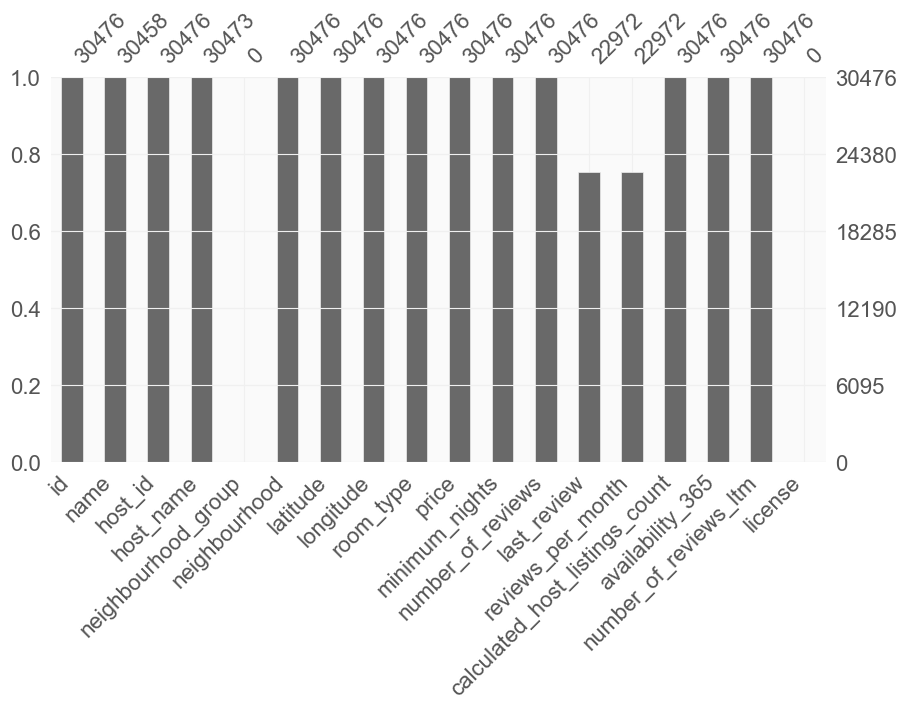

In [26]:
# visualização das entradas de cada coluna, aqui podemos notar visualmente as colunas com valores NaN
msno.bar (df, figsize = (10,5))

### Como vimos anteriormente, nosso dataset possui 30476 entradas. E analisando os valores ausentes no comando anterior notamos que as variáveis neighbourhood_group e license não tem dados. Sendo assim, elas não acrescentarão em nada na nossa análise, vamos deletar essas variáveis do nosso DataFrame.

In [ ]:
df.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

In [37]:
print(df)

                       id                                               name  \
0                   17878  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1                   24480   Nice and cozy near Ipanema Beach, w/ home office   
2                  200568  30m of Ipa Beach e fins de semana special price !   
3                  342874                    Comfortable in Copacabana beach   
4                   25026          Beautiful Modern Decorated Studio in Copa   
...                   ...                                                ...   
30471  853607834345127110                                  Copacabana Lisboa   
30472  853612101373839883                    Apto aconchegante e silencioso!   
30473  853630024042841468                               Stúdio Av. Atlântica   
30474  853663542225256426                          Estúdio com vista pro mar   
30475  853688154966788601                   Clean and Modern 2BD apt Ipanema   

         host_id     host_name neighbou

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

### A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

#### * As colunas `neighbourhood_group` e `license` possuíam 100% dos seus valores faltantes, sem dados, por isso apagamos elas.
#### * As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% das linhas.
#### * A variável `name` têm aproximadamente 0,06% dos valores nulos.
#### * A variável `host_name` têm aproximadamente 0,01% dos valores nulos.

In [39]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

last_review                       0.246227
reviews_per_month                 0.246227
name                              0.000591
host_name                         0.000098
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

In [40]:
# contagem de valores distintos ordenados por ordem decrescente
df.nunique().sort_values(ascending=False)

id                                30476
name                              29325
host_id                           18987
longitude                         17993
latitude                          15950
host_name                          5592
price                              2086
last_review                        1400
reviews_per_month                   609
availability_365                    366
number_of_reviews                   338
neighbourhood                       153
number_of_reviews_ltm                99
minimum_nights                       70
calculated_host_listings_count       57
room_type                             4
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?**

### Para identificar a distribuição das variáveis, irei plotar o histograma.

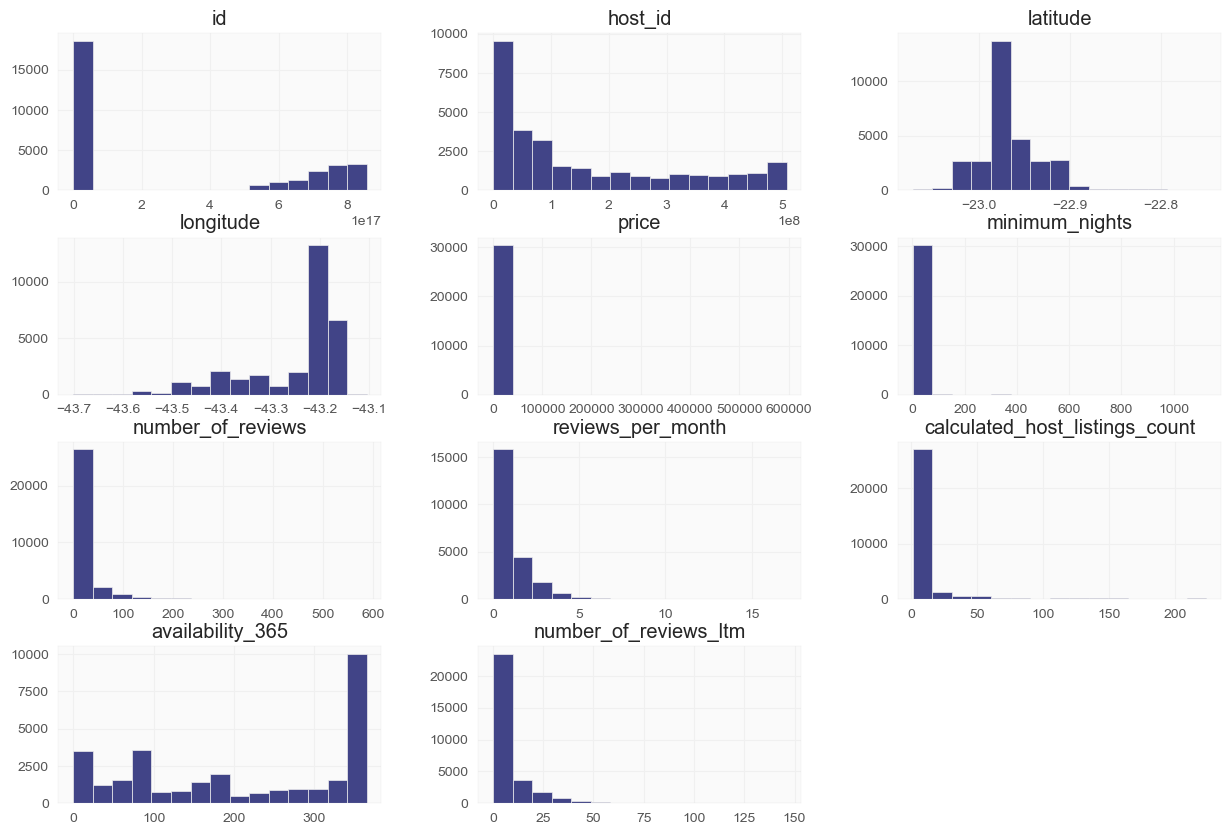

In [52]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10), color = corDefault);

### **Q4. Há *outliers* presentes?**

### Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `minimum_nights`.

### Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

### * Resumo estatístico por meio do método `describe()`
### * Plotar `boxplots` para a variável.

### Detecção de outliers:

In [43]:
# visualizando um resumo estatístico das variáveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30476.00,30476.00,30476.00,22972.00,30476.00,30476.00
mean,981.62,4.85,18.26,1.01,9.82,210.45
std,8625.19,24.35,38.50,1.08,28.25,136.08
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,200.00,1.00,1.00,0.23,1.00,85.00
50%,350.00,2.00,4.00,0.70,2.00,212.00
75%,650.00,4.00,17.00,1.44,4.00,359.00
max,595793.00,1125.00,588.00,17.01,224.00,365.00


### Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

#### * O valor mínimo da variável `price` é 0.
#### * A variável `price` possui 75% do valor abaixo de 650, porém seu valor máximo é 595793.
#### * O valor máximo da variável minimum_nights é 1.125.
#### * A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.
#### * O valor máximo da variável calculated_host_listinings_count é 224.

#### Boxplot para minimum_nights

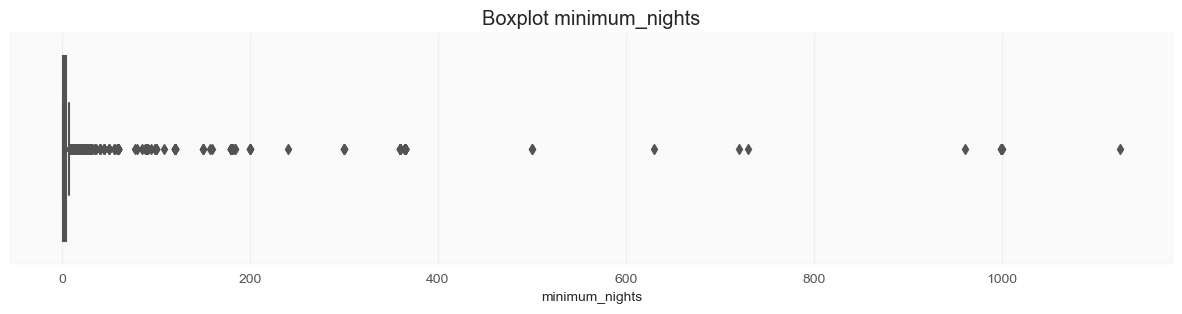

minimum_nights 
Valores acima de 30: 257 entradas
Porcentagem: 0.84%


In [64]:
# minimum_nights
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='minimum_nights')
plt.title('Boxplot minimum_nights')
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print(f'minimum_nights \nValores acima de 30: '
      f'{len(df[df.minimum_nights > 30])} entradas')
print('Porcentagem: {:.2f}%'.format(len(df[df.minimum_nights > 30])/ len(df.minimum_nights)* 100))

#### Boxplot para price

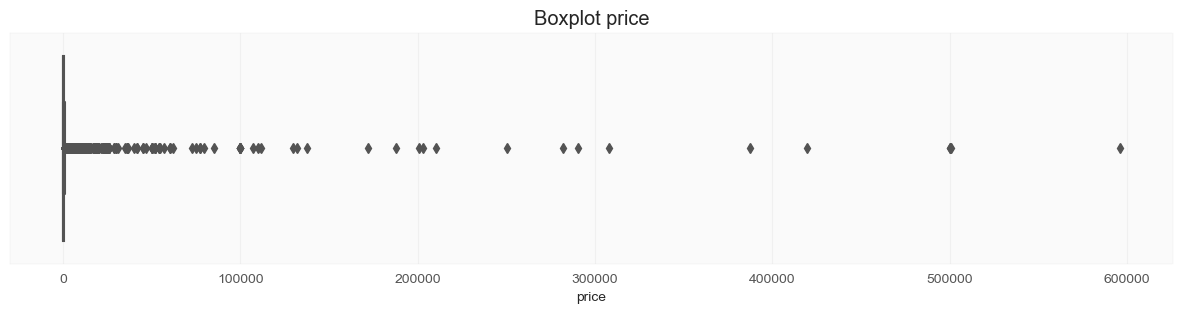

price 
Valores acima de 1500: 2417 entradas
Porcentagem: 7.93%


In [58]:
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.title('Boxplot price')
plt.show()

# ver quantidade de valores acima de 1500 para price
print(f'price \nValores acima de 1500: {len(df[df.price > 1500])} entradas')
print('Porcentagem: {:.2f}%'.format(len(df[df.price > 1500])/ len(df.price) * 100))

#### Histogramas sem *outliers*

#### Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

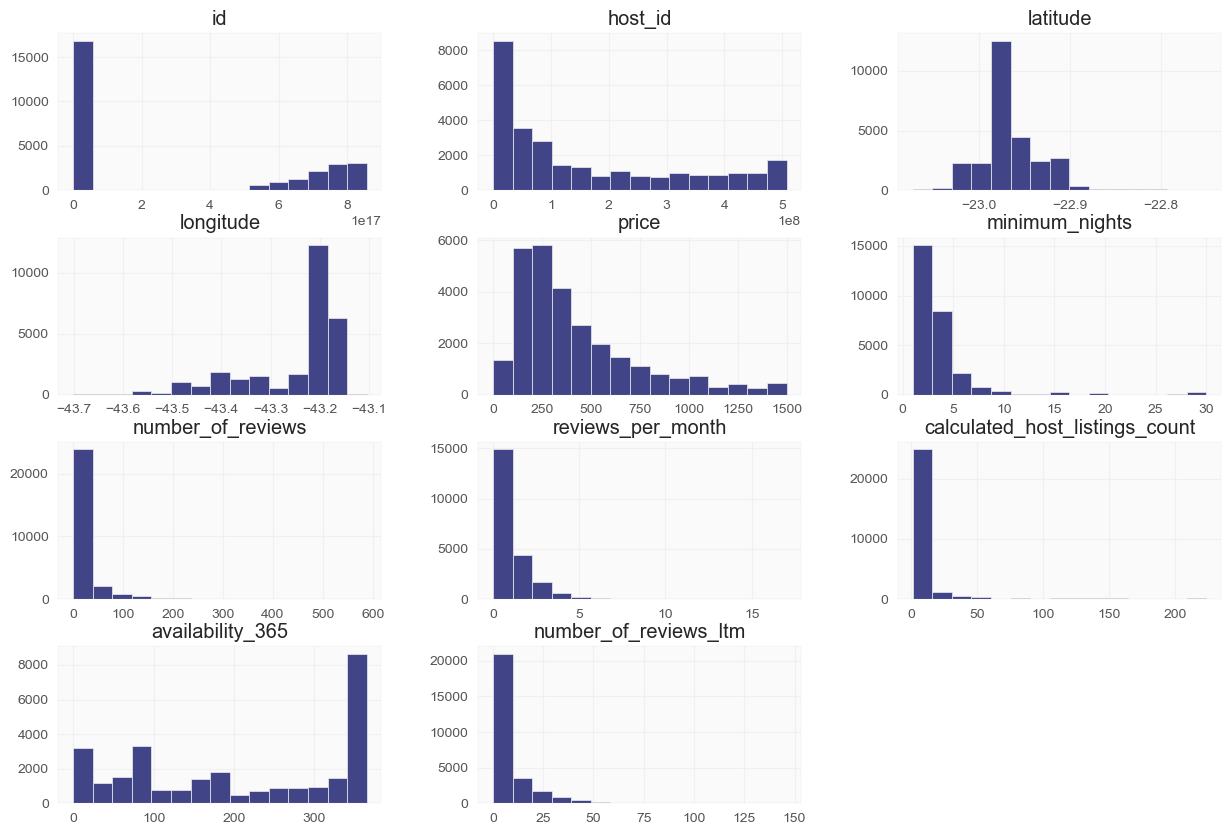

In [66]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), color = corDefault);

### **Q4. Qual a correlação existente entre as variáveis**

#### Correlação é a relação estatística entre duas variáveis.. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

#### Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

#### * Criar uma matriz de correlação
#### * Irei apresentar essa correlação através de uma matriz e de uma forma mais visual através de um heatmap (mapa de calor), usando a biblioteca `seaborn`
#### * Calculamos o coeficiente de correlação com a função corr()

In [68]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr);

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.101439,-0.147932,-0.161014,0.103955,0.104717
minimum_nights,0.101439,1.000000,-0.061055,-0.162096,0.001868,-0.036732
number_of_reviews,-0.147932,-0.061055,1.000000,0.419172,-0.048661,-0.123466
reviews_per_month,-0.161014,-0.162096,0.419172,1.000000,-0.019227,-0.061469
calculated_host_listings_count,0.103955,0.001868,-0.048661,-0.019227,1.000000,0.006530
availability_365,0.104717,-0.036732,-0.123466,-0.061469,0.006530,1.000000


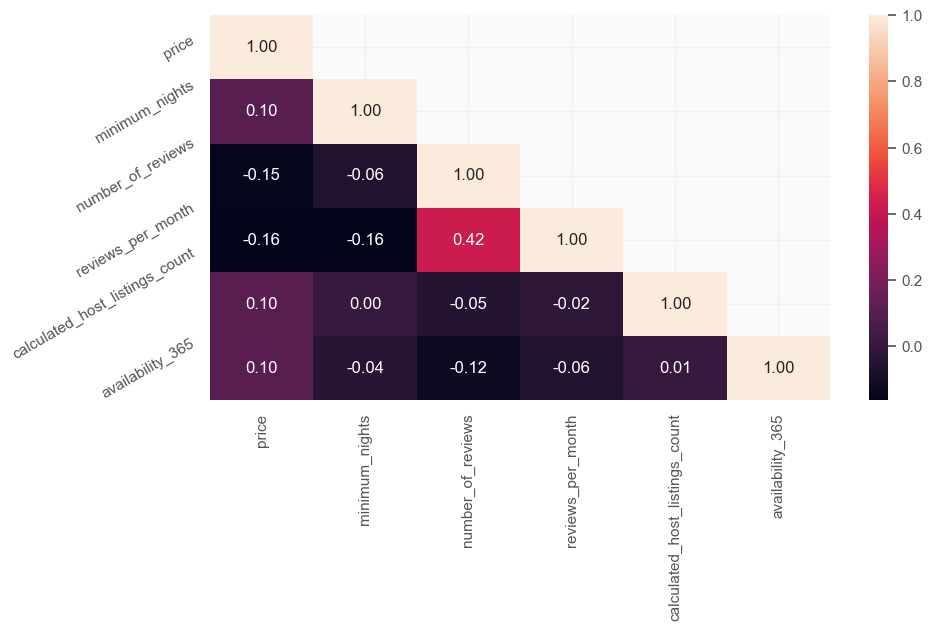

In [69]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 5))
# criando uma máscara para ver apenas os valores de correlação uma vez
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

#### A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

#### Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [70]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    21351
Private room        5959
Shared room          488
Hotel room            45
Name: room_type, dtype: int64

In [72]:
# porcentagem de cada tipo de imóvel disponível
df_clean['room_type'].value_counts() / len(df_clean)

Entire home/apt    0.766835
Private room       0.214021
Shared room        0.017527
Hotel room         0.001616
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do Rio?**

#### Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [73]:
# média de preço do top 10 localidades mais caras
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                  941.500000
Complexo do Alemão    900.000000
São Conrado           680.497268
Joá                   645.959184
Leblon                590.021953
Lagoa                 572.531401
Santíssimo            546.750000
Galeão                543.500000
Ipanema               539.762414
Grumari               530.571429
Name: price, dtype: float64

### Acima, vemos que a comunidade Complexo do Alemão está com média de preço superior a de lugares como Leblon, Ipanema e Lagoa.

### Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar.

### Como podemos ver existem bairros com mais imóveis alugados, o que pode influenciar diretamente na média de preços por localidade feita anteriormente.

In [79]:
# contagem de imóveis por localidade
df_clean['neighbourhood'].value_counts()

Copacabana                  8453
Ipanema                     2618
Barra da Tijuca             2584
Jacarepaguá                 1390
Recreio dos Bandeirantes    1361
                            ... 
Cavalcanti                     1
Magalhães Bastos               1
Acari                          1
Complexo do Alemão             1
Engenheiro Leal                1
Name: neighbourhood, Length: 153, dtype: int64

### Os 10 bairros com a maior quantidade de imóveis

In [141]:
# Agrupa os dados por bairro e conta a quantidade de imóveis em cada um deles
count_by_localidade = df_clean['neighbourhood'].value_counts()

# Seleciona as 10 localidades com a maior quantidade de imóveis
top_10_localidades = count_by_localidade.nlargest(10)

# Imprime o resultado
print(top_10_localidades)

Copacabana                  8453
Ipanema                     2618
Barra da Tijuca             2584
Jacarepaguá                 1390
Recreio dos Bandeirantes    1361
Leblon                      1321
Botafogo                    1310
Santa Teresa                1008
Centro                       971
Flamengo                     647
Name: neighbourhood, dtype: int64


### Os bairros com as 10 maiores quantidades de noites ocupadas usando a variável minimum_nights

In [182]:
# agrupa os dados por bairro e soma as noites ocupadas em cada um
df_bairro = df_clean.groupby("neighbourhood")["minimum_nights"].sum().reset_index()

# ordena os bairros em ordem decrescente pela quantidade de noites ocupadas
df_bairro = df_bairro.sort_values(by="minimum_nights", ascending=False)

# seleciona somente as 10 maiores quantidades de noites ocupadas
df_bairro_top10 = df_bairro.head(10)

# mostra somente as colunas "bairro" e "noites_ocupadas"
df_bairro_top10[["neighbourhood", "minimum_nights"]]

,neighbourhood,minimum_nights
34,Copacabana,26375
8,Barra da Tijuca,8923
65,Ipanema,8712
68,Jacarepaguá,5069
14,Botafogo,4717
78,Leblon,4544
111,Recreio dos Bandeirantes,4259
121,Santa Teresa,3156
26,Centro,2701
47,Flamengo,2427


### Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

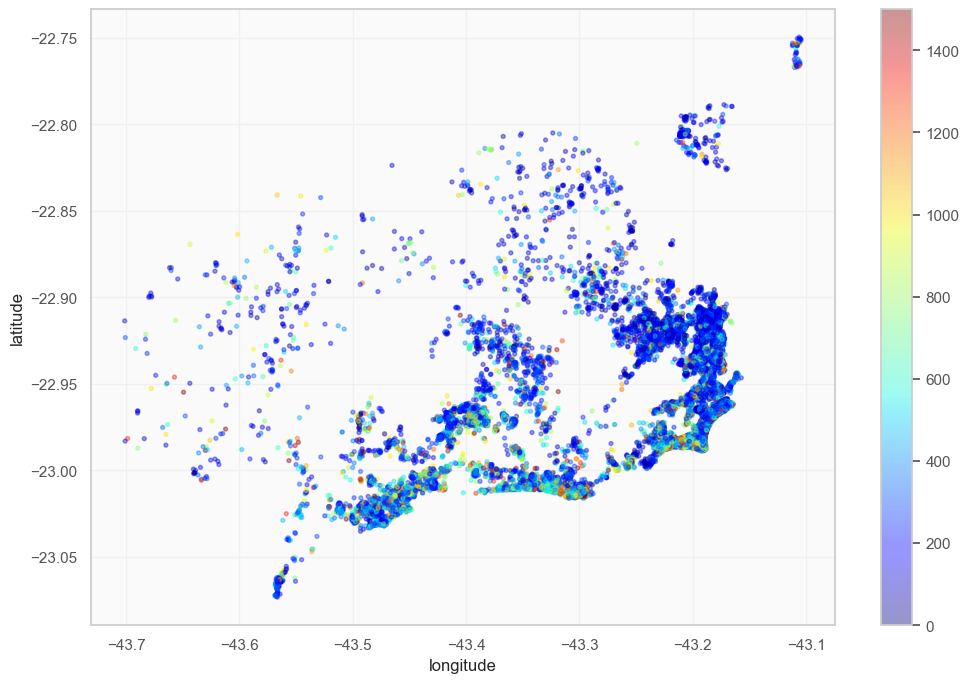

In [181]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

### Se percebeu que existem *outliers* em algumas das variáveis.

### Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

### Conseguimos identificar valores ausentes e outliers, fazer seu tratamento, plotamos alguns gráficos para análise e no final conseguimos responder algumas perguntas.